In [3]:
%load_ext autoreload
%autoreload 2

import platform 
print(platform.python_version())

import cnp.util
import cnp.graph
import cnp.points

from networkx.algorithms import isomorphism
import networkx as nx

import sympy as sp
from sympy import Symbol, I, S
from sympy.parsing.sympy_parser import parse_expr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.6.5


In [4]:
import pkgutil
import pysat
import pysat.solvers

for importer, modname, ispkg in pkgutil.iter_modules(pysat.__path__):
    print(modname)

_fileio
card
examples
formula
pb
solvers


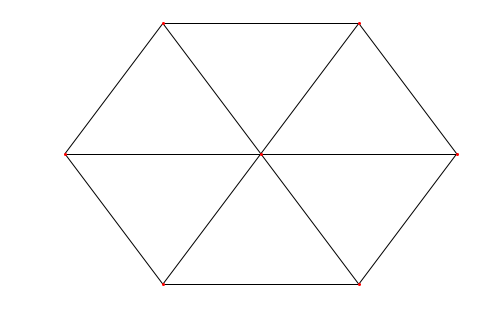

In [17]:
# Create simple set of points.
H = cnp.points.makeH()

# Make unit-length graph from points & display
G = cnp.graph.Graph(H)
G.show()

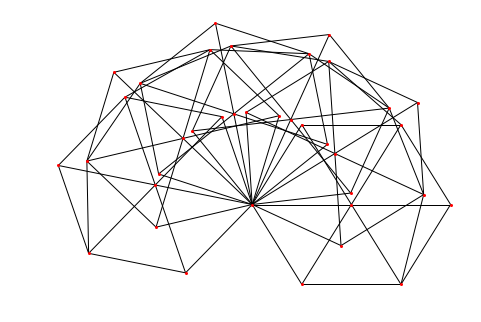

In [18]:
import sympy as sp
from sympy import S, I

for i in range(5):
    # Create a copy of H, rotated about (-1,0) slightly.
    Hr = cnp.points.rotated(H, offset=(-1 + 0*I), angle=2*sp.asin(1/sp.sqrt(12)))
    # And add it to our previous H
    H = cnp.points.add(H, Hr)

# Create unit length graph and draw
G = cnp.graph.Graph(H)
G.show()

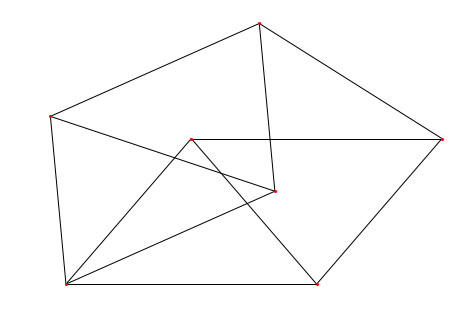

In [7]:
# Look for subgraphs that match moser spindles.
def makeMoser():
    # Make moser spindle
    H = cnp.points.empty()

    w = sp.simplify((1 + I * sp.sqrt(3))/2)

    H = cnp.points.addP(H, (0*I))
    H = cnp.points.addP(H, (1 + 0*I))
    H = cnp.points.addP(H, (w))
    H = cnp.points.addP(H, (1+w))

    # Create a copy of H, rotated about (-1,0) slightly.
    Hr = cnp.points.rotated(H, offset=(0*I), angle=2*sp.asin(1/sp.sqrt(12)))
    # And add it to our previous H
    H = cnp.points.add(H, Hr)

    return cnp.graph.Graph(H)
  
Gmoser = makeMoser()
Gmoser.show()

In [8]:
# Load record smallest graph from file...

def pointsFromFile(f_name):
    with open(f_name) as f:
        points_str = f.read().splitlines()
        
    def readExpr(s):
        s = s.replace('Sqrt', 'sqrt').replace('[', '(').replace(']', ')')
        return parse_expr(s, evaluate=True)

    def readPoint(pstr):
        # Drop first and last char {/}
        pstr = pstr[1:-1]
        cs = pstr.split(',')
        return readExpr(cs[0]) + readExpr(cs[1]) * I

    return [readPoint(pstr) for pstr in points_str]

# Taken from here, the record smallest graph G.
# https://dustingmixon.wordpress.com/2019/07/08/polymath16-thirteenth-thread-bumping-the-deadline/#comment-23934
gp = pointsFromFile('graphs/517.vtx')
G_points = (gp, [complex(p) for p in gp])
#print(G_points)

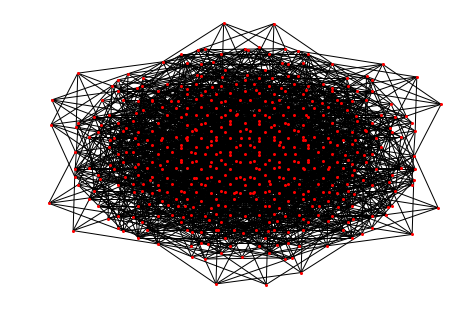

In [21]:
# Create and view graph.
G = cnp.graph.Graph((G_points))
G.show()

In [10]:
# Check edges
print(len(G.G.edges))

# And prove CNP >= 5 while we're at it...
from cnp.sat import isColourable, genMinGraph, optimize
print("Is colourable in 4 colours?", isColourable(G, 4))

2579

In [27]:
GM = isomorphism.GraphMatcher(G.G, Gmoser.G)

i = 0
for iso in GM.subgraph_isomorphisms_iter():
    if i % 100 == 0:
        print(i, iso)
    i += 1
    
# Since there are 8 isomorphisms between two mozer spindles, we just divide by 8.
print("Number of isomorphisms:", i, "But really:", i//8)  # 3400 / 425

0 {0: 0, 59: 1, 79: 2, 268: 3, 190: 4, 202: 5, 329: 6}
10 {0: 0, 73: 1, 313: 2, 29: 3, 205: 4, 315: 5, 156: 6}
20 {0: 0, 190: 1, 202: 2, 329: 3, 59: 4, 79: 5, 268: 6}
30 {0: 0, 205: 1, 315: 2, 156: 3, 73: 4, 313: 5, 29: 6}
40 {0: 0, 378: 1, 59: 2, 14: 3, 190: 4, 380: 5, 143: 6}
50 {0: 0, 400: 1, 405: 2, 434: 3, 407: 4, 408: 5, 440: 6}
60 {0: 0, 403: 1, 402: 2, 431: 3, 410: 4, 411: 5, 453: 6}
70 {0: 0, 405: 1, 404: 2, 450: 3, 408: 4, 409: 5, 435: 6}
80 {0: 0, 408: 1, 407: 2, 440: 3, 400: 4, 405: 5, 434: 6}
90 {0: 0, 410: 1, 411: 2, 453: 3, 402: 4, 403: 5, 431: 6}
100 {1: 0, 5: 1, 0: 2, 3: 3, 242: 4, 358: 5, 72: 6}
110 {1: 0, 358: 1, 242: 2, 72: 3, 0: 4, 5: 5, 3: 6}
120 {2: 0, 28: 1, 40: 2, 82: 3, 0: 4, 4: 5, 3: 6}
130 {3: 0, 0: 1, 5: 2, 1: 3, 10: 4, 335: 5, 250: 6}
140 {3: 0, 36: 1, 10: 2, 69: 3, 0: 4, 4: 5, 2: 6}
150 {4: 0, 3: 1, 0: 2, 5: 3, 109: 4, 293: 5, 183: 6}
160 {5: 0, 0: 1, 1: 2, 6: 3, 151: 4, 166: 5, 213: 6}
170 {5: 0, 151: 1, 274: 2, 130: 3, 0: 4, 3: 5, 4: 6}
180 {6: 0, 1: 1,

1420 {195: 0, 250: 1, 327: 2, 256: 3, 190: 4, 331: 5, 206: 6}
1430 {195: 0, 331: 1, 252: 2, 259: 3, 184: 4, 327: 5, 201: 6}
1440 {200: 0, 128: 1, 73: 2, 47: 3, 33: 4, 115: 5, 107: 6}
1450 {201: 0, 184: 1, 327: 2, 195: 3, 183: 4, 319: 5, 379: 6}
1460 {201: 0, 327: 1, 184: 2, 195: 3, 183: 4, 319: 5, 379: 6}
1470 {202: 0, 190: 1, 0: 2, 380: 3, 185: 4, 327: 5, 193: 6}
1480 {204: 0, 6: 1, 188: 2, 197: 3, 189: 4, 321: 5, 380: 6}
1490 {204: 0, 213: 1, 6: 2, 257: 3, 316: 4, 321: 5, 76: 6}
1500 {204: 0, 321: 1, 316: 2, 76: 3, 6: 4, 213: 5, 257: 6}
1510 {205: 0, 189: 1, 331: 2, 196: 3, 0: 4, 184: 5, 378: 6}
1520 {206: 0, 187: 1, 321: 2, 381: 3, 190: 4, 331: 5, 195: 6}
1530 {206: 0, 321: 1, 315: 2, 78: 3, 213: 4, 331: 5, 259: 6}
1540 {212: 0, 255: 1, 327: 2, 249: 3, 205: 4, 331: 5, 189: 6}
1550 {212: 0, 331: 1, 260: 2, 253: 3, 202: 4, 327: 5, 185: 6}
1560 {213: 0, 151: 1, 53: 2, 130: 3, 85: 4, 313: 5, 107: 6}
1570 {213: 0, 313: 1, 85: 2, 107: 3, 53: 4, 151: 5, 130: 6}
1580 {214: 0, 234: 1, 315: 2

2820 {400: 0, 439: 1, 401: 2, 384: 3, 394: 4, 414: 5, 468: 6}
2830 {401: 0, 400: 1, 439: 2, 382: 3, 397: 4, 437: 5, 423: 6}
2840 {401: 0, 439: 1, 400: 2, 382: 3, 397: 4, 437: 5, 423: 6}
2850 {402: 0, 401: 1, 443: 2, 384: 3, 442: 4, 489: 5, 480: 6}
2860 {402: 0, 443: 1, 401: 2, 384: 3, 442: 4, 489: 5, 480: 6}
2870 {403: 0, 402: 1, 431: 2, 386: 3, 398: 4, 427: 5, 420: 6}
2880 {403: 0, 431: 1, 402: 2, 386: 3, 398: 4, 427: 5, 420: 6}
2890 {404: 0, 396: 1, 416: 2, 460: 3, 405: 4, 450: 5, 392: 6}
2900 {404: 0, 416: 1, 469: 2, 465: 3, 0: 4, 405: 5, 400: 6}
2910 {404: 0, 501: 1, 452: 2, 487: 3, 403: 4, 456: 5, 388: 6}
2920 {405: 0, 400: 1, 434: 2, 382: 3, 415: 4, 504: 5, 463: 6}
2930 {405: 0, 434: 1, 400: 2, 382: 3, 415: 4, 504: 5, 463: 6}
2940 {405: 0, 471: 1, 447: 2, 478: 3, 0: 4, 404: 5, 403: 6}
2950 {406: 0, 407: 1, 0: 2, 408: 3, 415: 4, 469: 5, 472: 6}
2960 {406: 0, 415: 1, 469: 2, 472: 3, 0: 4, 407: 5, 408: 6}
2970 {406: 0, 469: 1, 415: 2, 472: 3, 0: 4, 407: 5, 408: 6}
2980 {407: 0, 397: